In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
tests = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/testperform_long.csv")

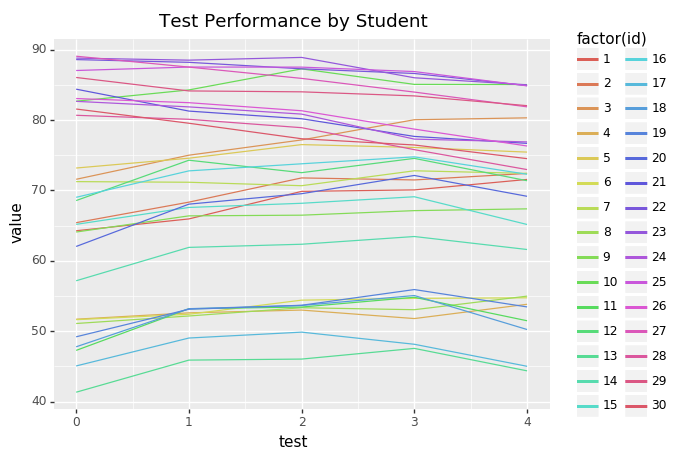

<ggplot: (277225204)>

In [7]:
(ggplot(tests, aes("test", "value", color = "factor(id)")) + geom_line() +
  ggtitle("Test Performance by Student"))

In [8]:
# wide data

tests_wide = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/testperform.csv")

tests_wide.head()

,zero,one,two,three,four,id
0,64.27,65.950884,69.865513,70.071844,71.557456,1
1,65.42,68.334638,71.774954,71.488519,72.414197,2
2,71.58,75.002741,77.169056,80.038548,80.307990,3
3,51.71,52.610899,53.005482,51.800135,53.829034,4
4,73.18,74.575287,76.507547,76.102415,75.441424,5


In [9]:
features = ["zero", "one", "two", "three", "four"]

X = tests_wide[features]

hac = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "ward")

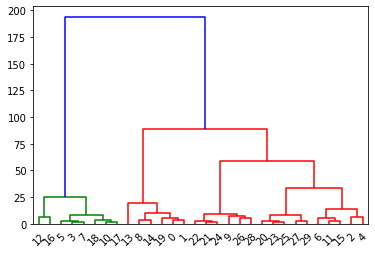

In [11]:
hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method='ward'))

In [14]:
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)



AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [17]:
membership = hac.labels_
membership

array([2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
silhouette_score(X,membership)

0.52758926790124

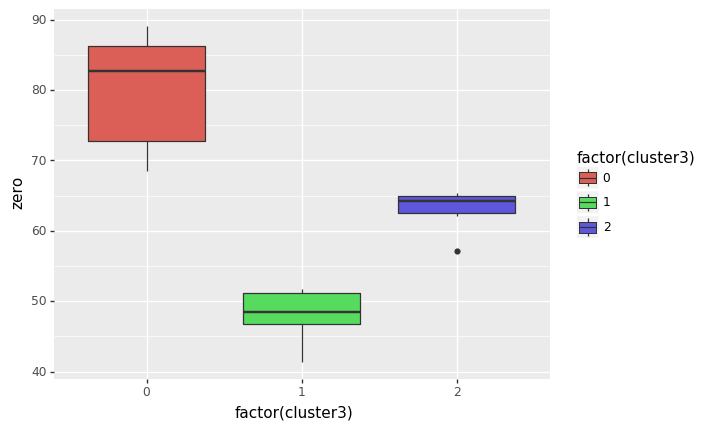

<ggplot: (310340669)>

In [21]:
tests_wide["cluster3"] = membership
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "zero")) + geom_boxplot(aes(fill = "factor(cluster3)")))

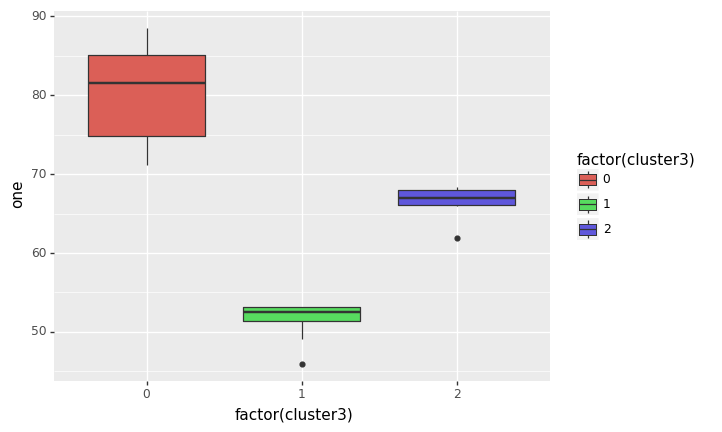

<ggplot: (310286692)>

In [22]:
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "one")) + geom_boxplot(aes(fill = "factor(cluster3)")))

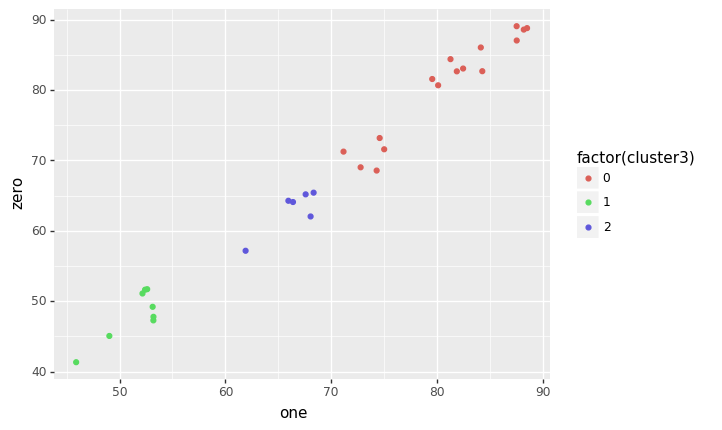

<ggplot: (310581682)>

In [23]:
(ggplot(tests_wide, aes(x = "one", y = "zero")) + geom_point(aes(color = "factor(cluster3)")))